In [ ]:
Implement anomaly detection for given credit card dataset using Autoencoder and
build the model by using the following steps:
a. Import required libraries
b. Upload / access the dataset
c. Encoder converts it into latent representation
d. Decoder networks convert it back to the original input
e. Compile the models with Optimizer, Loss, and Evaluation Metrics

In [9]:
# Step a: Import required libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt

In [10]:
# Step b: Upload / Access the dataset
# Make sure 'creditcard.csv' is in the same folder as your notebook
data = pd.read_csv("creditcard.csv")

# Display first few rows
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [11]:
# Separate features and target
X = data.drop('Class', axis=1)   # Features (transaction details)
y = data['Class']                # Labels: 0 = Normal, 1 = Fraud

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Step c: Encoder - Convert input into latent representation
input_dim = X_scaled.shape[1]  # number of features
encoding_dim = 14              # size of latent space

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
decoder = Dense(input_dim, activation="sigmoid")(encoder)

# Combine Encoder + Decoder
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [13]:
# Step e: Compile the model (Optimizer, Loss, Metrics)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the model on only NORMAL transactions (Class = 0)
X_train = X_scaled[y == 0]

history = autoencoder.fit(X_train, X_train,
                          epochs=10,
                          batch_size=32,
                          validation_split=0.1,verbose=1
                          )

Epoch 1/10
7997/7997 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - loss: 0.7558 - val_loss: 0.6964
Epoch 2/10
7997/7997 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - loss: 0.7024 - val_loss: 0.6832
Epoch 3/10
7997/7997 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - loss: 0.6936 - val_loss: 0.6753
Epoch 4/10
7997/7997 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - loss: 0.6898 - val_loss: 0.6735
Epoch 5/10
7997/7997 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 0.6879 - val_loss: 0.6725
Epoch 6/10
7997/7997 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - loss: 0.6867 - val_loss: 0.6727
Epoch 7/10
7997/7997 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - loss: 0.6862 - val_loss: 0.6721
Epoch 8/10
7997/7997 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - loss: 0.6857 - val_loss: 0.6727
Epoch 9/10
7997/7997 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 0.6854 - val_loss: 0.6716
Epoch 10/10
7997/7997 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - loss: 0.6851 - val_loss: 0.6702


In [6]:
# Step d: Decoder reconstructs the data
# (already handled automatically during training)

# Evaluate reconstruction error
reconstructions = autoencoder.predict(X_scaled)
mse = np.mean(np.power(X_scaled - reconstructions, 2), axis=1)

# Define a threshold for anomaly
threshold = np.percentile(mse, 95)  # top 5% as anomalies
print("Reconstruction error threshold:", threshold)

# Predict anomalies
y_pred = (mse > threshold).astype(int)

8901/8901 ━━━━━━━━━━━━━━━━━━━━ 7s 811us/step
Reconstruction error threshold: 1.4322027078765542



Confusion Matrix:
[[270504  13811]
 [    62    430]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    284315
           1       0.03      0.87      0.06       492

    accuracy                           0.95    284807
   macro avg       0.51      0.91      0.52    284807
weighted avg       1.00      0.95      0.97    284807



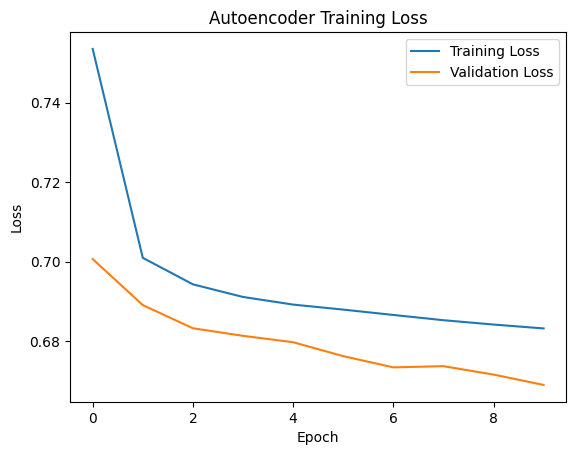

In [7]:
# Step e: Evaluation Metrics
from sklearn.metrics import classification_report, confusion_matrix

print("\nConfusion Matrix:")
print(confusion_matrix(y, y_pred))
print("\nClassification Report:")
print(classification_report(y, y_pred))

# Plot Training Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()